## Investigation #3:
### Expertise in certain topics by a user and how they change. What is the common paths people take in terms of the topics they answer questions on.  

E.g.: Do users tend to answer more with questions of a specific tag? Does that distribution change as they post more? Are there trends where people switch from tag to tag over time?   

In [1]:
import pandas as pd
import xml.etree.ElementTree
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools

We turn the posts data to a data frame

In [2]:
tree = xml.etree.ElementTree.parse('../XML-Data/Posts.xml')
root = tree.getroot()
data = []
for i in range(len(root)):
    data.append(root[i].attrib)
    
posts_df = pd.DataFrame(data)

In [3]:
print(posts_df)
print(posts_df.columns)

           Id PostTypeId             CreationDate Score ViewCount  \
0           5          1  2014-05-13T23:58:30.457     9       919   
1           7          1  2014-05-14T00:11:06.457     4       487   
2           9          2  2014-05-14T00:36:31.077     5       NaN   
3          10          2  2014-05-14T00:53:43.273    13       NaN   
4          14          1  2014-05-14T01:25:59.677    26      1913   
...       ...        ...                      ...   ...       ...   
77594  123521          1  2023-09-02T13:07:57.780     0        12   
77595  123522          1  2023-09-02T18:10:35.933     0         6   
77596  123523          1  2023-09-02T19:18:23.623     0         5   
77597  123524          2  2023-09-02T20:58:44.510     0       NaN   
77598  123525          1  2023-09-02T22:52:08.440     0         6   

                                                    Body OwnerUserId  \
0      <p>I've always been interested in machine lear...           5   
1      <p>As a researcher a

We clean any html tags in text

In [4]:
def remove_html_tags(html_text):
    # Remove html tags from a string
    clean = re.compile('<.*?>')
    return re.sub(clean, '', html_text)

* Here we extract and process posts_df that are questions and do not have missing data in the "Tags" or "OwnerUserId" fields. We select specific columns, sort them by user ID and creation date in descending order, and performs a deep copy. 
* Additionally, we convert the "OwnerUserId" field to an integer type and the "CreationDate" field to a datetime type. 
* The "Tags" field is also transformed from a single string with tags enclosed in angle brackets to a list of strings. 
* Finally, the DataFrame is sorted again (ascending by default) and the resulting data along with their types are printed out.

In [5]:
# Get the posts that are questions that are not missing any data as a deep copy
test_cases = posts_df.loc[posts_df["Tags"].notna() & posts_df["OwnerUserId"].notna() & posts_df["PostTypeId"] == 1,["OwnerUserId", "CreationDate", "Tags"]].sort_values(by=['OwnerUserId', 'CreationDate'], ascending=False, ignore_index=False).copy(deep=True)
# Convert the OwnerUserId column to int
test_cases["OwnerUserId"] = test_cases["OwnerUserId"].astype(int)
# Convert the Creation Date String to datetime
test_cases["CreationDate"] = pd.to_datetime(test_cases["CreationDate"])

# Convert the tags to lists of strings instead of being <t1><t2> 
tags = np.asarray(test_cases["Tags"])
for i in range(len(tags)):
    tags[i] = tags[i].replace("<", "").replace(">", " ").split()

# Sort it
test_cases.sort_values(["OwnerUserId", "CreationDate"],inplace=True)

print(test_cases)
print(test_cases.dtypes)

       OwnerUserId            CreationDate  \
0                5 2014-05-13 23:58:30.457   
21271           11 2018-06-12 12:56:32.003   
23              26 2014-05-14 09:51:54.753   
1935            26 2015-02-24 11:59:36.033   
2135            26 2015-04-11 21:35:14.517   
...            ...                     ...   
77571       154136 2023-08-31 15:16:40.257   
77574       154145 2023-09-01 05:07:40.087   
77593       154170 2023-09-02 11:08:53.763   
77592       154171 2023-09-02 10:55:56.777   
77594       154173 2023-09-02 13:07:57.780   

                                                    Tags  
0                                     [machine-learning]  
21271  [machine-learning, time-series, data-science-m...  
23                                          [algorithms]  
1935   [neural-network, image-classification, convolu...  
2135   [neural-network, convolutional-neural-network,...  
...                                                  ...  
77571                            [

Here we get the number of unique users and the number of questions asked per user

Number of Unique Users: 20503
134


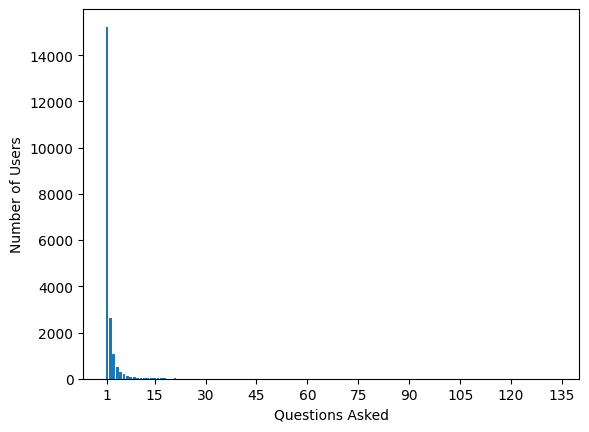

In [33]:
unique_users, unique_user_post_counts = np.unique(test_cases["OwnerUserId"], return_counts=True)
print(f"Number of Unique Users: {len(unique_users)}")
num_users_with_question = np.zeros(np.max(unique_user_post_counts)+1).astype(int)
for i in range(np.max(unique_user_post_counts)+1):
    num_users_with_question[i] = len(unique_users[unique_user_post_counts == i])

min_index = 1
max_index = len(num_users_with_question)
print(max_index)
plt.bar(np.linspace(min_index,max_index-1, num=max_index-min_index).astype(int), num_users_with_question[min_index:max_index])
plt.xlabel("Questions Asked")
plt.ylabel("Number of Users")
plt.xticks(np.linspace(1,len(num_users_with_question)+1,num=10).astype(int))
plt.show()

Here we are getting the top ten unique tags

In [7]:
# Make a dictionary that counts the unique tags
unique_tags = dict()

for tag_list in tags:
    for element in tag_list:
        if element not in unique_tags:
            unique_tags[element] = 1
        else:
            unique_tags.update({element: unique_tags.get(element) + 1})
tag_counts = np.array(list(sorted(unique_tags.items(), key=lambda x:x[1], reverse=True)))
print(tag_counts)
print()
print(unique_tags.keys())
print(sum(unique_tags.values()))
top_ten_tags = tag_counts[0:10]
top_ten_tags_percent = np.zeros(10)
for i in range (len(top_ten_tags)):
    top_ten_tags_percent[i] = int(top_ten_tags[i][1]) / sum(unique_tags.values())
print(top_ten_tags)
print(top_ten_tags_percent)
print(sum(top_ten_tags_percent))

[['machine-learning' '11165']
 ['python' '6558']
 ['deep-learning' '4794']
 ...
 ['pad-truncate' '1']
 ['data-license' '1']
 ['archive-org' '1']]

dict_keys(['python', 'pytorch', 'gpu', 'image-segmentation', 'visualization', 'regression', 'statistics', 'scikit-learn', 'fuzzy-classification', 'word-embeddings', 'sentiment-analysis', 'classification', 'class-imbalance', 'beginner', 'smote', 'nlp', 'bert', 'transformer', 'machine-learning', 'r', 'bootstraping', 'random-forest', 'gradient-descent', 'machine-learning-model', 'keras', 'preprocessing', 'text', 'sequence', 'matplotlib', 'plotting', 'ggplot2', 'heatmap', 'lstm', 'rnn', 'neural-network', 'time-series', 'prediction', 'forecasting', 'data', 'linear-regression', 'data-cleaning', 'missing-data', 'data-imputation', 'feature-extraction', 'encoding', 'features', 'language-model', 'stanford-nlp', 'gpt', 'embeddings', 'huggingface', 'classifier', 'transfer-learning', 'text-classification', 'regularization', 'cross-validation', 'auc', 'lo

In [8]:
print(test_cases)

       OwnerUserId            CreationDate  \
0                5 2014-05-13 23:58:30.457   
21271           11 2018-06-12 12:56:32.003   
23              26 2014-05-14 09:51:54.753   
1935            26 2015-02-24 11:59:36.033   
2135            26 2015-04-11 21:35:14.517   
...            ...                     ...   
77571       154136 2023-08-31 15:16:40.257   
77574       154145 2023-09-01 05:07:40.087   
77593       154170 2023-09-02 11:08:53.763   
77592       154171 2023-09-02 10:55:56.777   
77594       154173 2023-09-02 13:07:57.780   

                                                    Tags  
0                                     [machine-learning]  
21271  [machine-learning, time-series, data-science-m...  
23                                          [algorithms]  
1935   [neural-network, image-classification, convolu...  
2135   [neural-network, convolutional-neural-network,...  
...                                                  ...  
77571                            [

Now, we get the amount of questions per user

In [9]:
question_tags_matrix = []

for entry in unique_users:
    temp = [entry]
    question_tags_matrix.append(temp)

temp = test_cases[['OwnerUserId', "Tags"]]
prev = None
qtm_index = -1
for i in range(len(temp)):
    if temp.OwnerUserId.iloc[i] != prev:
        qtm_index += 1
        question_tags_matrix[qtm_index].append(temp.Tags.iloc[i])
        prev = temp.OwnerUserId.iloc[i]
    else:
        question_tags_matrix[qtm_index].append(temp.Tags.iloc[i])
        prev = temp.OwnerUserId.iloc[i]

In [10]:
# Slice off the OwnerUserID data since it is no longer needed
question_tags_matrix = list(map(lambda x:x[1:], question_tags_matrix))
user_question_tags_df = pd.DataFrame(data={"OwnerUserId": unique_users, "NumQuestions": unique_user_post_counts, "QuestionTags": question_tags_matrix})
print(user_question_tags_df)
print(user_question_tags_df.dtypes)

       OwnerUserId  NumQuestions  \
0                5             1   
1               11             1   
2               26            10   
3               34             1   
4               36             2   
...            ...           ...   
20498       154136             1   
20499       154145             1   
20500       154170             1   
20501       154171             1   
20502       154173             1   

                                            QuestionTags  
0                                   [[machine-learning]]  
1      [[machine-learning, time-series, data-science-...  
2      [[algorithms], [neural-network, image-classifi...  
3      [[deep-learning, reinforcement-learning, corre...  
4      [[education, open-source], [bigdata, clusterin...  
...                                                  ...  
20498                          [[hyperparameter-tuning]]  
20499               [[time-series, markov-hidden-model]]  
20500  [[time-series, linear-regress

In [11]:
count = np.zeros(max(user_question_tags_df.NumQuestions)).astype(int)

# For each tag track its usage as the users asks more questions
for q in user_question_tags_df.QuestionTags:
    for i in range(len(q)):
        if 'python' in q[i]:
            count[i] = count[i] + 1
print(count)

[3718  994  525  282  201  139  121   66   74   59   49   44   34   28
   23   17   20   18   12   12   13   11   10    7    6    6    6    5
    4    5    5    7    4    2    5    2    1    4    2    2    2    1
    1    1    0    0    1    0    0    1    0    0    0    1    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    0    0    0    0    0    1
    0    0    0    0    0    0    0    0    0    0    1    0    0    0
    0    0    0    1    0    0    0    1    0    0    0    0    0    0
    0    1    0    0    0    0    1]


In [12]:
def count_pattern(tag_pattern, tag_series):
    count = 0
    for tag_set in tag_series:
        
        match = True
        # Setting this to be == only looks for users who asked exactly that many questions
        if len(tag_set) >= len(tag_pattern):
            for i in range(len(tag_pattern)):
                if tag_pattern[i] != '*' and tag_pattern[i] not in tag_set[i] :
                    match = False
                    break
                    
            if match:
                count += 1
    return count
                    
                

In [13]:
# Note '*' can be used to represent any tag
pattern = ['*', 'python']
occurs = count_pattern(pattern, user_question_tags_df.QuestionTags)
print(f"Pattern {pattern} occurs in the dataset {occurs} times out of {len(user_question_tags_df.QuestionTags)} or {occurs/len(user_question_tags_df.QuestionTags) * 100}%")

Pattern ['*', 'python'] occurs in the dataset 994 times out of 20503 or 4.848071013997952%


In [14]:
# top_ten_tags_plus_other = np.append(top_ten_tags[:, 0], '*')
top_ten_tags_plus_other = top_ten_tags[:, 0]
print(top_ten_tags_plus_other)
top_ten_pairs = list(itertools.product(top_ten_tags_plus_other, repeat=4))
top_ten_tags_plus_other_occurrence_rates = []
for pattern in top_ten_pairs:
    occurs = count_pattern(pattern, user_question_tags_df.QuestionTags)
    top_ten_tags_plus_other_occurrence_rates.append(np.around(occurs/len(user_question_tags_df.QuestionTags) * 100 , 3))
    # print(f"Pattern {pattern} occurs in the dataset {occurs} times out of {len(user_question_tags_df.QuestionTags)} or {np.around(occurs/len(user_question_tags_df.QuestionTags) * 100 , 3)}%")
      
combined = np.hstack((np.asarray(top_ten_pairs),np.reshape(np.asarray(top_ten_tags_plus_other_occurrence_rates) , (-1,1))))
# print(combined[:, -1:])
print(combined[combined[:, -1:].argmax()])

['machine-learning' 'python' 'deep-learning' 'neural-network'
 'classification' 'keras' 'nlp' 'scikit-learn' 'tensorflow' 'time-series']
['machine-learning' 'machine-learning' 'machine-learning'
 'machine-learning' '0.654']


In [15]:
for tag in top_ten_tags_plus_other:
    funny_order = []
    pattern = []
    for i in range(1):
        pattern.append(tag)
    for entry in combined:
        if np.array_equal(np.asarray(entry[:len(pattern)]), np.asarray(pattern)):
            funny_order.append(list(entry))
    funny_order = np.asarray(funny_order)
    print(funny_order[funny_order[:, -1:].argmax()])
    print()

['machine-learning' 'machine-learning' 'machine-learning'
 'machine-learning' '0.654']

['python' 'python' 'python' 'python' '0.322']

['deep-learning' 'deep-learning' 'deep-learning' 'deep-learning' '0.19']

['neural-network' 'machine-learning' 'machine-learning' 'machine-learning'
 '0.146']

['classification' 'machine-learning' 'machine-learning' 'machine-learning'
 '0.122']

['keras' 'keras' 'keras' 'keras' '0.078']

['nlp' 'nlp' 'nlp' 'nlp' '0.078']

['scikit-learn' 'python' 'python' 'python' '0.078']

['tensorflow' 'deep-learning' 'deep-learning' 'deep-learning' '0.049']

['time-series' 'time-series' 'time-series' 'time-series' '0.039']
